In [38]:
%matplotlib inline

In [39]:
import pandas as pd

In [40]:
import numpy as np

In [41]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [42]:
from scipy.stats import zscore

In [43]:
import seaborn as sns

In [44]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("d:\ml-Data\winequality-red.csv") 

In [45]:
wine_data_attr = wine_data.iloc[:,0:11]

In [46]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH', 'sulphates','alcohol']


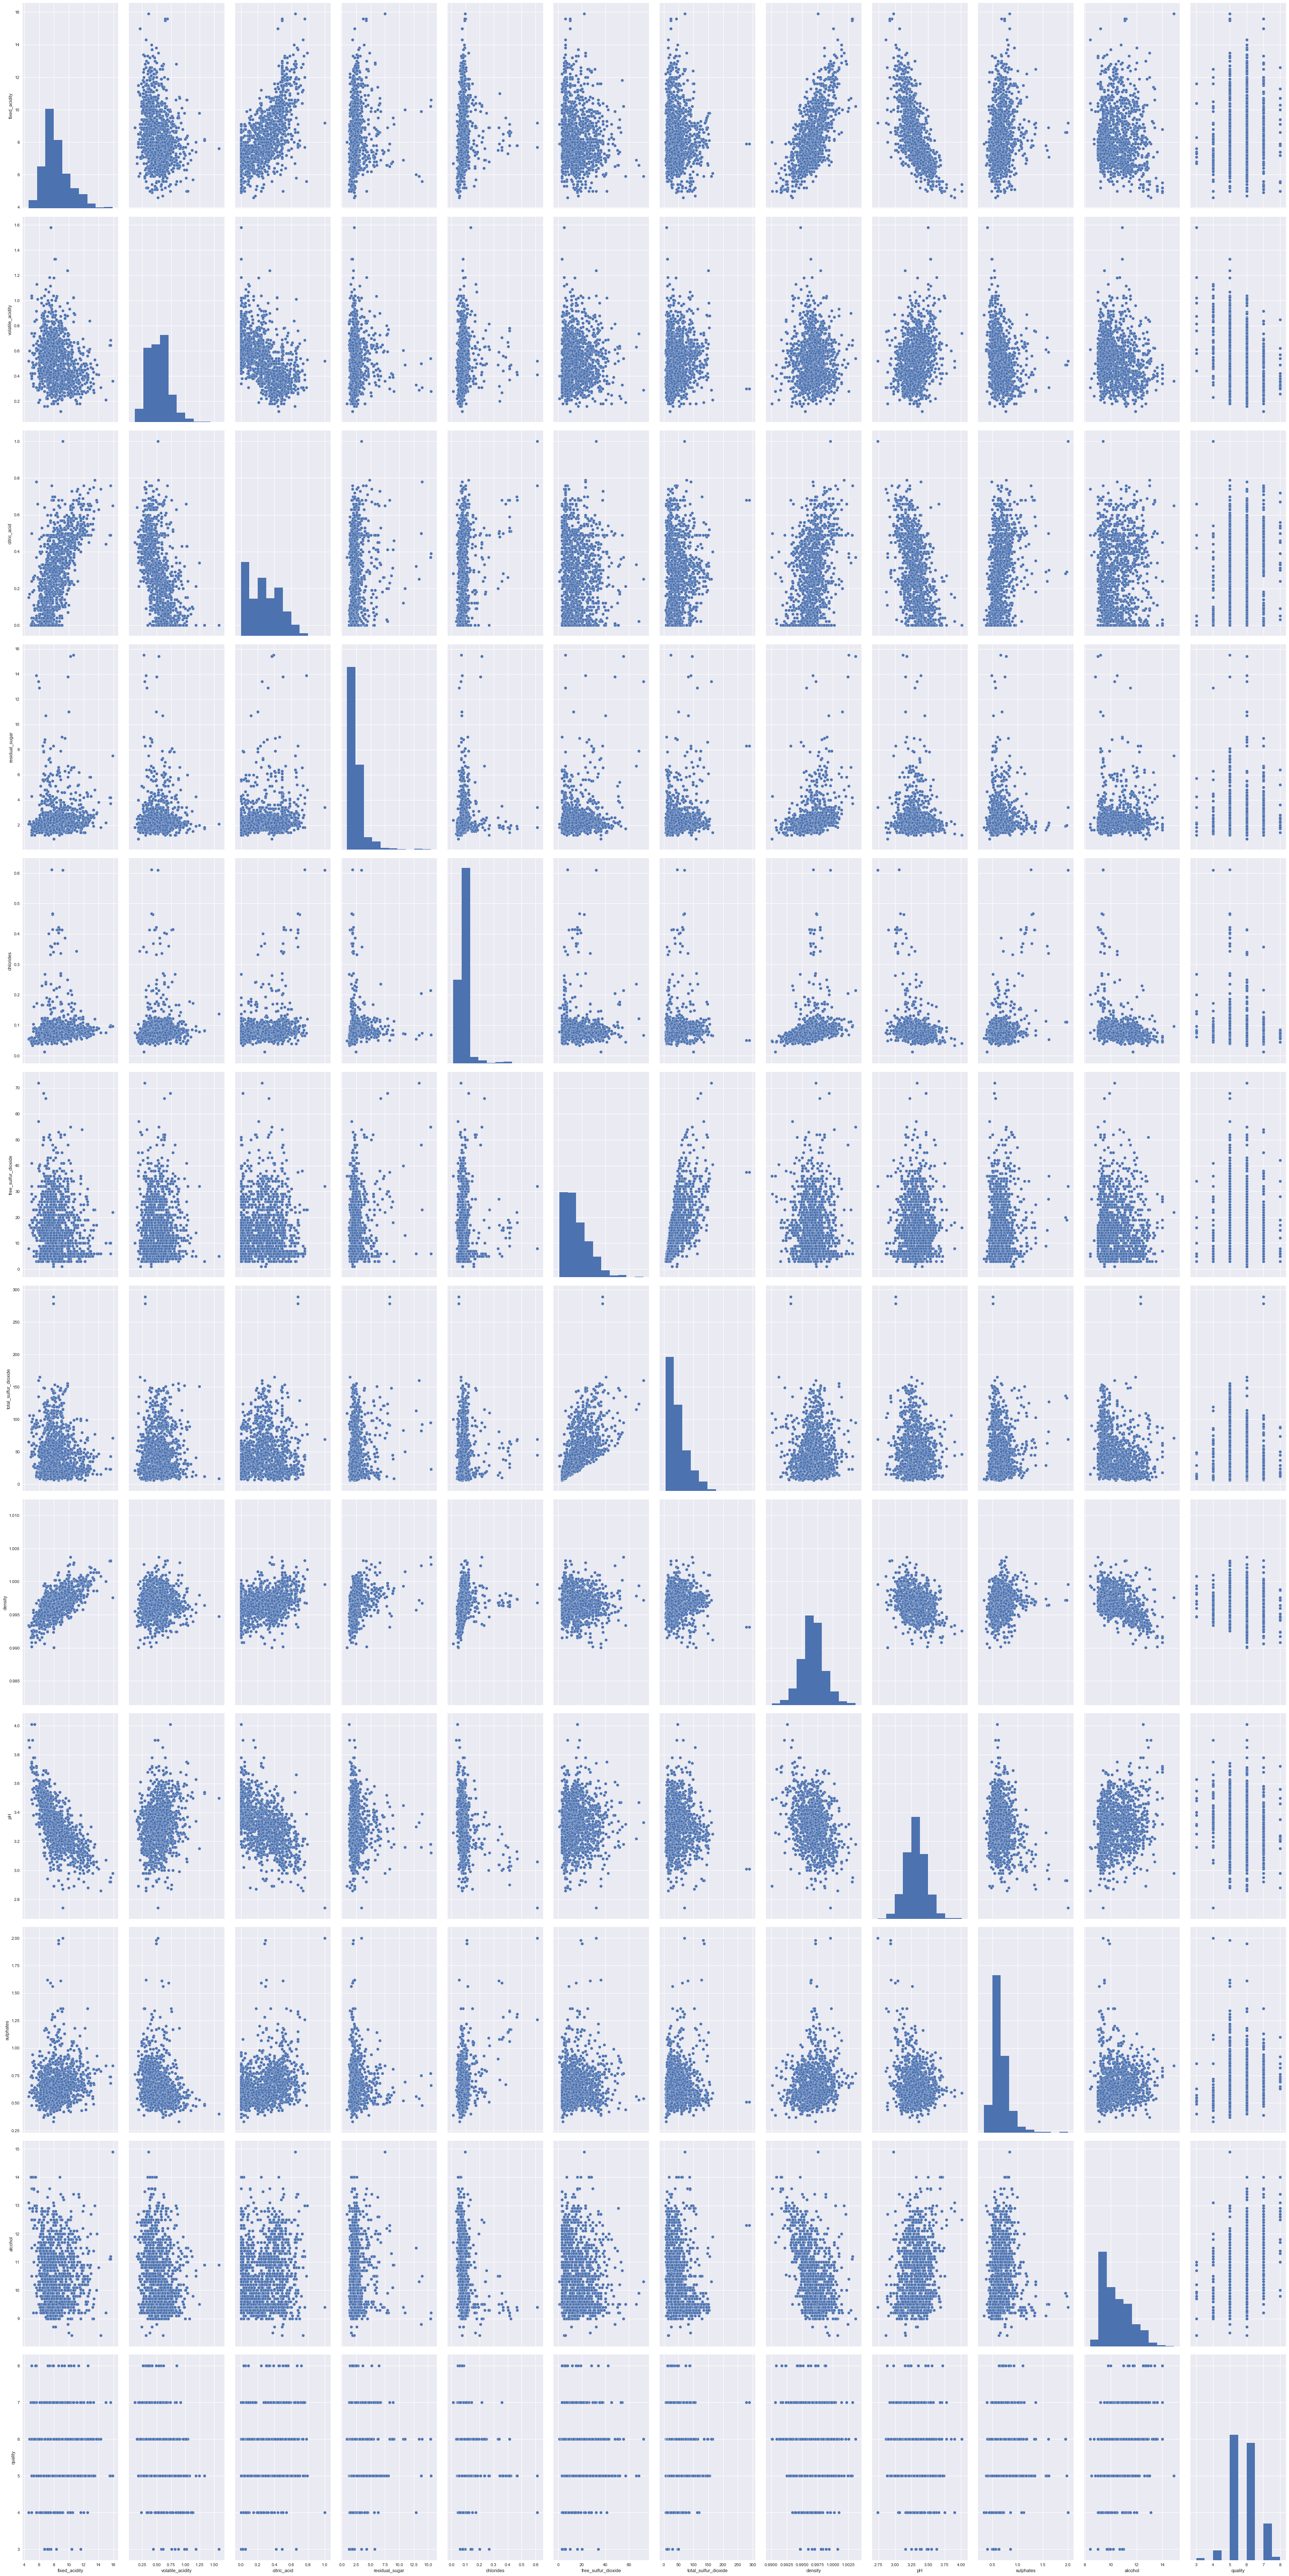

In [47]:
#importing seaborn for statistical plots
import seaborn as sns


sns.pairplot(wine_data, size=7,aspect=0.5)

In [12]:
from sklearn.cluster import AgglomerativeClustering 

In [48]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [49]:
model.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x000001E8E8705D08>)

In [50]:
wine_data_attr['labels'] = model.labels_
type(wine_data_attr)
wine_data_attr.head(40)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   
20            8.9             0.220         0.48             1.8      0.077   
21            7.6             0.390         0.31             2.3      0.082   
22            7.9             0.430         0.21             1.6      0.106   
23            8.5             0.490         0.11             2.3      0.084   
24            6.9             0.400         0.14             2.4      0.085   
25            6.3             0.390         0.16             1.4      0.080   
26            7.6             0.410         0.24             1.8      0.080   
27            7.9             0.430         0.21             1.6      0.106   
28            7.1             0.710         0.00             1.9      0.080   
29            7.8             0.645         0.00             2.0      0.082   
30            6.7             0.675         0.07             2.4      0.089   
31            6.9             0.685         0.00             2.5      0.105   
32            8.3             0.655         0.12             2.3      0.083   
33            6.9             0.605         0.12            10.7      0.073   
34            5.2             0.320         0.25             1.8      0.103   
35            7.8             0.645         0.00             5.5      0.086   
36            7.8             0.600         0.14             2.4      0.086   
37            8.1             0.380         0.28             2.1      0.066   
38            5.7             1.130         0.09             1.5      0.172   
39            7.3             0.450         0.36             5.9      0.074   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9             

In [51]:
wine_clusters = wine_data_attr.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])

In [53]:
print(wine_clusters)

In [54]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object

In [55]:
    from pandas import ExcelWriter
    writer = ExcelWriter('d:\wine_groups.xls')
    wine_groups.to_excel(writer,'Sheet1')
    writer.save()



PermissionError: [Errno 13] Permission denied: 'd:\\wine_groups.xls'

In [56]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [57]:
from scipy.spatial.distance import pdist

In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.75793129745388199

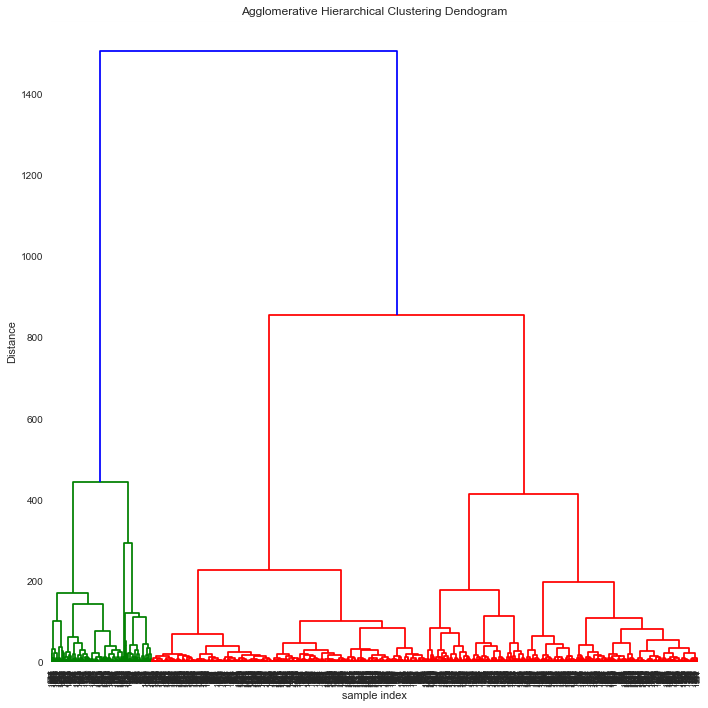

In [37]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()